In [19]:
#Importing the required libraries
import os
import glob
import librosa
import librosa.display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy import fftpack
from scipy.stats import kurtosis,skew,mode
import sklearn.preprocessing,sklearn.decomposition
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.utils import shuffle
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit,StratifiedKFold,train_test_split
from keras import utils
import keras
from keras import layers
from keras.layers import Activation, Dense, Dropout, Conv1D, Conv2D, Flatten,Reshape, BatchNormalization, ZeroPadding2D,MaxPooling1D,AveragePooling1D, MaxPooling2D, GlobalMaxPooling2D, GlobalAveragePooling1D, AveragePooling2D, Input, Add
from keras.models import Sequential
from keras import regularizers,optimizers
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.utils import to_categorical
import keras.backend as K
from keras.models import load_model
from keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings("ignore")

In [20]:
train_df = pd.read_excel(r'/Users/dj/Academics/ML in Biomedical Signal/Assignment5/Train1.xlsx')
test_df = pd.read_excel(r'/Users/dj/Academics/ML in Biomedical Signal/Assignment5/Test1.xlsx')

In [21]:
from sklearn.model_selection import train_test_split


X_train = train_df  # Replace 'label' with the actual label column name if different
y_train = np.random.randint(0, 2, len(train_df))
X_test = test_df
y_test = np.random.randint(0, 2, len(test_df))


Random Forest F1 Score: 0.38636363636363635
Best Parameters from Grid Search: {'max_depth': 10, 'n_estimators': 50}
Accuracy: 0.47

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.52      0.53       115
           1       0.38      0.39      0.39        87

    accuracy                           0.47       202
   macro avg       0.46      0.46      0.46       202
weighted avg       0.47      0.47      0.47       202



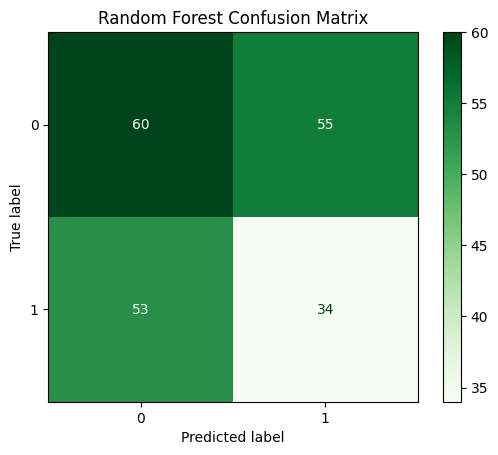

In [22]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, classification_report , confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Grid Search
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}


# Grid Search with Random Forest
rf = RandomForestClassifier()
grid_search_rf = GridSearchCV(rf, param_grid_rf, scoring='f1', cv=3)
grid_search_rf.fit(X_train, y_train)

# Train with best RF parameters
best_rf = grid_search_rf.best_estimator_
rf_pred = best_rf.predict(X_test)
rf_f1 = f1_score(y_test, rf_pred)
accuracy_rf = accuracy_score(y_test, rf_pred)
print(f"Random Forest F1 Score: {rf_f1}")
print(f"Best Parameters from Grid Search: {grid_search_rf.best_params_}")
print(f"Accuracy: {accuracy_rf:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, rf_pred))
rf_conf_matrix = confusion_matrix(y_test, rf_pred)

# Plot the confusion matrix
ConfusionMatrixDisplay(rf_conf_matrix).plot(cmap='Greens')
plt.title("Random Forest Confusion Matrix")
plt.show()


Best Parameters from Grid Search: {'C': 0.1, 'kernel': 'rbf'}
Accuracy: 0.47
F1 Score: 0.53

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.30      0.40       115
           1       0.43      0.69      0.53        87

    accuracy                           0.47       202
   macro avg       0.50      0.50      0.46       202
weighted avg       0.51      0.47      0.45       202



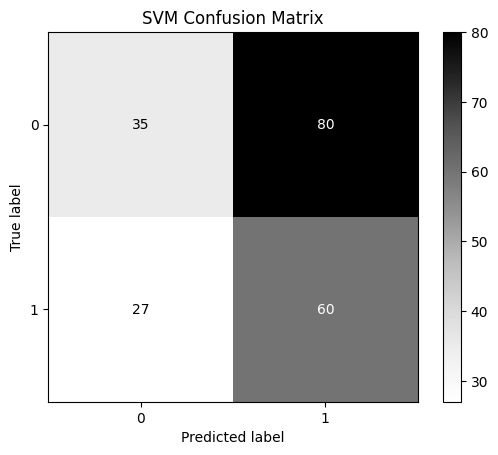

In [23]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Define parameter grid for Grid Search
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

scaler = StandardScaler()
train_X_normalized = scaler.fit_transform(train_df)
test_X_normalized = scaler.fit_transform(test_df)
train_X_normalized = pd.DataFrame(train_X_normalized, columns=train_df.columns)
test_X_normalized = pd.DataFrame(test_X_normalized, columns=test_df.columns)


# Grid Search with SVM
svm = SVC()
grid_search_svm = GridSearchCV(svm, param_grid_svm, scoring='f1', cv=3)
grid_search_svm.fit(train_X_normalized, y_train)

# Train with best SVM parameters
best_svm = grid_search_svm.best_estimator_
svm_pred = best_svm.predict(test_X_normalized)
svm_f1 = f1_score(y_test, svm_pred)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, svm_pred)

print(f"Best Parameters from Grid Search: {grid_search_svm.best_params_}")
print(f"Accuracy: {accuracy_svm:.2f}")
print(f"F1 Score: {svm_f1:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, svm_pred))
svm_conf_matrix = confusion_matrix(y_test, svm_pred)

# Plot the confusion matrix
ConfusionMatrixDisplay(svm_conf_matrix).plot(cmap='Greys')
plt.title("SVM Confusion Matrix")
plt.show()


In [24]:
print("Model Comparison:")
print("\nSVM Model Performance:")
print(f"Accuracy: {accuracy_svm:.2f}")
print(f"F1 Score: {svm_f1:.2f}")
print("\nClassification Report for SVM:")
print(classification_report(y_test, svm_pred))

print("\nRandom Forest Model Performance:")
print(f"Accuracy: {accuracy_rf:.2f}")
print(f"F1 Score: {rf_f1:.2f}")
print("\nClassification Report for Random Forest:")
print(classification_report(y_test, rf_pred))

Model Comparison:

SVM Model Performance:
Accuracy: 0.47
F1 Score: 0.53

Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.56      0.30      0.40       115
           1       0.43      0.69      0.53        87

    accuracy                           0.47       202
   macro avg       0.50      0.50      0.46       202
weighted avg       0.51      0.47      0.45       202


Random Forest Model Performance:
Accuracy: 0.47
F1 Score: 0.39

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.53      0.52      0.53       115
           1       0.38      0.39      0.39        87

    accuracy                           0.47       202
   macro avg       0.46      0.46      0.46       202
weighted avg       0.47      0.47      0.47       202



In [25]:
import pandas as pd

comparison_df = pd.DataFrame({
    "Metric": ["Accuracy", "F1 Score"],
    "SVM": [accuracy_svm, svm_f1],
    "Random Forest": [accuracy_rf, rf_f1]
})

print("\nComparison Table:")
print(comparison_df)



Comparison Table:
     Metric       SVM  Random Forest
0  Accuracy  0.470297       0.465347
1  F1 Score  0.528634       0.386364
